In [1]:
# ----------------------------
# Common Setup for Project 5
# ----------------------------

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# ----------------------------
# Load / Generate Dataset
# ----------------------------
X, y = make_blobs(n_samples=300, centers=4, cluster_std=2.5, random_state=42)
data = pd.DataFrame(X, columns=['Annual_Income', 'Spending_Score'])

# ----------------------------
# Handle Missing Values
# ----------------------------
data.fillna(data.mean(numeric_only=True), inplace=True)

# ----------------------------
# Scale Features
# ----------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# ----------------------------
# Display Basic Info
# ----------------------------
print("Dataset preview:")
print(data.head())
print("\nDataset shape:", data.shape)


Dataset preview:
   Annual_Income  Spending_Score
0      -9.986730        5.198912
1     -10.989361        6.362134
2      -0.452835        5.962177
3      -7.423830       -4.133167
4     -13.933639        4.803307

Dataset shape: (300, 2)


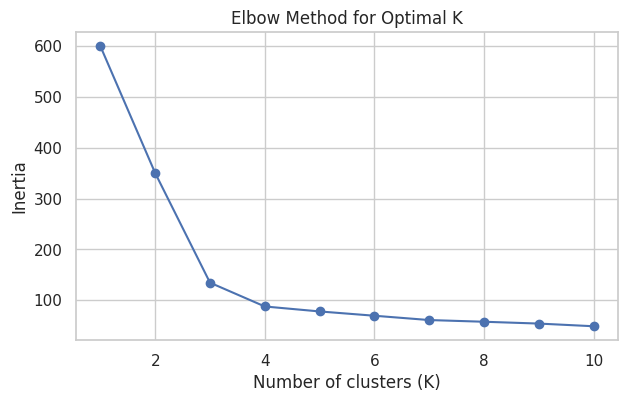

In [2]:
# Q1 – How many clusters are optimal?

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using scaled_data from Q6
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()


In [3]:
#  Q2 – What is the elbow method?

print("The elbow method plots number of clusters vs inertia.")
print("The 'elbow point' where inertia decrease slows is the optimal number of clusters.")


The elbow method plots number of clusters vs inertia.
The 'elbow point' where inertia decrease slows is the optimal number of clusters.


In [4]:
# Q3 – What defines each cluster?

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

print("Clustered data preview:\n", data.head())


Clustered data preview:
    Annual_Income  Spending_Score  Cluster
0      -9.986730        5.198912        3
1     -10.989361        6.362134        3
2      -0.452835        5.962177        0
3      -7.423830       -4.133167        1
4     -13.933639        4.803307        3


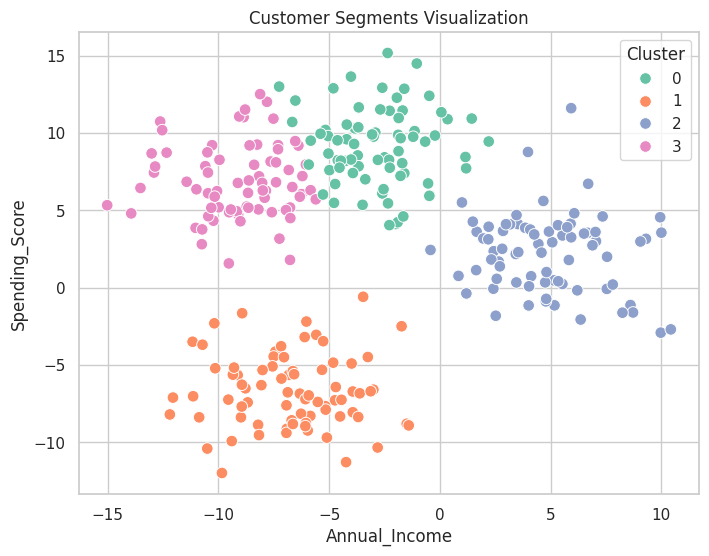

In [5]:
#  Q4 – How to visualize clusters?

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data, x='Annual_Income', y='Spending_Score',
    hue='Cluster', palette='Set2', s=70
)
plt.title("Customer Segments Visualization")
plt.show()


In [6]:
# Q5 – What is inertia?

print("Inertia = Sum of squared distances between data points and their cluster centers.")
print("Lower inertia indicates tighter clusters.")


Inertia = Sum of squared distances between data points and their cluster centers.
Lower inertia indicates tighter clusters.


In [7]:
# Q6 – How to scale features?

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Annual_Income', 'Spending_Score']])

print("Scaled features (first 5 rows):\n", scaled_data[:5])


Scaled features (first 5 rows):
 [[-1.14184884  0.3635663 ]
 [-1.3160408   0.54184566]
 [ 0.51452075  0.48054688]
 [-0.69658387 -1.06669983]
 [-1.82756443  0.30293456]]


In [8]:
# Q7 – What is silhouette score?

from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"For k = {k}, Silhouette Score = {score:.3f}")


For k = 2, Silhouette Score = 0.459
For k = 3, Silhouette Score = 0.580
For k = 4, Silhouette Score = 0.532
For k = 5, Silhouette Score = 0.457
For k = 6, Silhouette Score = 0.407


In [9]:
# Q8 – How to interpret results?

print("Interpretation:")
print(" - Clusters represent customers with similar income and spending patterns.")
print(" - High income & high spending → Premium segment")
print(" - Low income & low spending → Budget segment")


Interpretation:
 - Clusters represent customers with similar income and spending patterns.
 - High income & high spending → Premium segment
 - Low income & low spending → Budget segment


In [10]:
# Q9 – What is the business impact?

print("Business Impact:")
print("Customer segmentation helps in targeted marketing, personalized offers, and improved revenue.")


Business Impact:
Customer segmentation helps in targeted marketing, personalized offers, and improved revenue.


In [11]:
# Q10 – How to use clustering in marketing?

print("Marketing Use:")
print(" - Target high-value customers with premium promotions")
print(" - Offer loyalty programs to low-engagement clusters")
print(" - Predict customer behavior for campaigns")


Marketing Use:
 - Target high-value customers with premium promotions
 - Offer loyalty programs to low-engagement clusters
 - Predict customer behavior for campaigns


In [12]:
# Q11 – How to load and prepare the dataset for clustering?

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Generate synthetic customer data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=2.5, random_state=42)
data = pd.DataFrame(X, columns=['Annual_Income', 'Spending_Score'])

print("Dataset preview:")
print(data.head())
print("Dataset shape:", data.shape)


Dataset preview:
   Annual_Income  Spending_Score
0      -9.986730        5.198912
1     -10.989361        6.362134
2      -0.452835        5.962177
3      -7.423830       -4.133167
4     -13.933639        4.803307
Dataset shape: (300, 2)


In [13]:
# Q12 – How to handle missing values before clustering?

# Introduce missing value for demonstration
data.loc[5, 'Annual_Income'] = np.nan

print("Missing values before handling:\n", data.isnull().sum())

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

print("Missing values after handling:\n", data.isnull().sum())


Missing values before handling:
 Annual_Income     1
Spending_Score    0
dtype: int64
Missing values after handling:
 Annual_Income     0
Spending_Score    0
dtype: int64


In [14]:
# Q13 – How to assign cluster labels to customers?

data['Cluster'] = kmeans.fit_predict(scaled_data)
print("Cluster labels assigned:")
print(data['Cluster'].value_counts())


Cluster labels assigned:
Cluster
2    73
3    64
0    58
4    47
1    29
5    29
Name: count, dtype: int64


In [15]:
# Q14 – How to describe cluster centers (centroids)?

centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=['Annual_Income', 'Spending_Score']
)
print("Cluster Centroids:\n", centroids)


Cluster Centroids:
    Annual_Income  Spending_Score
0      -4.093532        7.840022
1      -9.337748       -6.438524
2       4.893594        2.007865
3      -9.487382        6.774716
4      -5.101629       -6.820618
5      -0.908730       11.049399


In [16]:
# Q15 – How to predict the segment of a new customer?

# Example: new customer [Annual_Income, Spending_Score]
new_customer = np.array([[60000, 50]])
scaled_new = scaler.transform(new_customer)

predicted_cluster = kmeans.predict(scaled_new)
print("Predicted cluster for new customer:", predicted_cluster[0])


Predicted cluster for new customer: 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
